In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import plot_model
from keras import regularizers
from sklearn.metrics import roc_curve, auc
from keras.layers import Activation
from keras import backend as K

In [249]:
# load saved df
df = pd.read_pickle('test.pkl')
print (df.keys())

Index([      b'pt_of_muon',      b'eta_of_muon',      b'phi_of_muon',
         b'energy_of_muon',        b'hcal_ieta',        b'hcal_iphi',
           b'IsolationR04',     b'IsolationR03',      b'ecal_3into3',
            b'hcal_3into3',         b'ecal_3x3',         b'hcal_1x1',
       'b'hcal_edepth1'_x', 'b'hcal_edepth2'_x', 'b'hcal_edepth3'_x',
       'b'hcal_edepth4'_x', 'b'hcal_edepth5'_x', 'b'hcal_edepth6'_x',
       'b'hcal_edepth7'_x', 'b'hcal_edepth1'_y', 'b'hcal_edepth2'_y',
       'b'hcal_edepth3'_y', 'b'hcal_edepth4'_y', 'b'hcal_edepth5'_y',
       'b'hcal_edepth6'_y', 'b'hcal_edepth7'_y'],
      dtype='object')


In [250]:
# filter events

#print(df[b'hcal_ieta'])


df = df.loc[abs(df[b'hcal_ieta']) >= 24] 
df = df.loc[abs(df[b'hcal_ieta']) <= 27] 
print(df[b'hcal_ieta'])

df = df.loc[df["b'hcal_edepth1'_x"] > 0.00001]
df = df.loc[df["b'hcal_edepth1'_y"] > 0.00001]

df = df.loc[df["b'hcal_edepth2'_x"] > 0.00001]
df = df.loc[df["b'hcal_edepth2'_y"] > 0.00001]

df = df.loc[df["b'hcal_edepth3'_x"] > 0.00001]
df = df.loc[df["b'hcal_edepth3'_y"] > 0.00001]

df = df.loc[df["b'hcal_edepth4'_x"] > 0.00001]
df = df.loc[df["b'hcal_edepth4'_y"] > 0.00001]

df = df.loc[df["b'hcal_edepth5'_x"] > 0.00001]
df = df.loc[df["b'hcal_edepth5'_y"] > 0.00001]

df = df.loc[df["b'hcal_edepth6'_x"] > 0.00001]
df = df.loc[df["b'hcal_edepth6'_y"] > 0.00001]

#if ieta in range (26,28):
df = df.loc[df["b'hcal_edepth7'_x"] > 0.00001]
df = df.loc[df["b'hcal_edepth7'_y"] > 0.00001]

0       -24
1        25
2       -24
3        24
5        26
         ..
76212    24
76213   -25
76214    24
76215   -26
76217    25
Name: b'hcal_ieta', Length: 66144, dtype: int32


In [251]:
df["b'hcal_edepth1'_x"]=np.log(10000*df["b'hcal_edepth1'_x"])
df["b'hcal_edepth1'_y"]=np.log(10000*df["b'hcal_edepth1'_y"])

df["b'hcal_edepth2'_x"]=np.log(10000*df["b'hcal_edepth2'_x"])
df["b'hcal_edepth2'_y"]=np.log(10000*df["b'hcal_edepth2'_y"])

df["b'hcal_edepth3'_x"]=np.log(10000*df["b'hcal_edepth3'_x"])
df["b'hcal_edepth3'_y"]=np.log(10000*df["b'hcal_edepth3'_y"])

df["b'hcal_edepth4'_x"]=np.log(10000*df["b'hcal_edepth4'_x"])
df["b'hcal_edepth4'_y"]=np.log(10000*df["b'hcal_edepth4'_y"])

df["b'hcal_edepth5'_x"]=np.log(10000*df["b'hcal_edepth5'_x"])
df["b'hcal_edepth5'_y"]=np.log(10000*df["b'hcal_edepth5'_y"])

df["b'hcal_edepth6'_x"]=np.log(10000*df["b'hcal_edepth6'_x"])
df["b'hcal_edepth6'_y"]=np.log(10000*df["b'hcal_edepth6'_y"])

df["b'hcal_edepth7'_x"]=np.log(10000*df["b'hcal_edepth7'_x"])
df["b'hcal_edepth7'_y"]=np.log(10000*df["b'hcal_edepth7'_y"])

In [252]:
# keep originals before scaling
df['hcal_edepth1_un'] = df["b'hcal_edepth1'_x"]
df['hcal_edepth2_un'] = df["b'hcal_edepth2'_x"]
df['hcal_edepth3_un'] = df["b'hcal_edepth3'_x"]
df['hcal_edepth4_un'] = df["b'hcal_edepth4'_x"]
df['hcal_edepth5_un'] = df["b'hcal_edepth5'_x"]
df['hcal_edepth6_un'] = df["b'hcal_edepth6'_x"]
df['hcal_edepth7_un'] = df["b'hcal_edepth7'_x"]

df['hcal_ieta_un'] = df[b'hcal_ieta']

In [253]:
# scaling input vars
cols_to_minmax =[b'pt_of_muon',b'eta_of_muon',b'phi_of_muon',b'energy_of_muon',b'hcal_ieta',
                b'hcal_iphi',     b'IsolationR04',     b'IsolationR03',
                b'ecal_3into3',      b'hcal_3into3', 
                b'ecal_3x3',         b'hcal_1x1',
               "b'hcal_edepth1'_x", "b'hcal_edepth2'_x", "b'hcal_edepth3'_x",
               "b'hcal_edepth4'_x", "b'hcal_edepth5'_x", "b'hcal_edepth6'_x",
               "b'hcal_edepth7'_x"]


df[cols_to_minmax] = df[cols_to_minmax].apply(lambda x: (x - x.min()) /  (x.max() - x.min()))

b'pt_of_muon'


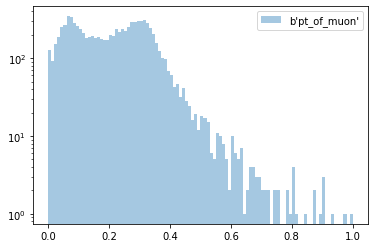

b'eta_of_muon'


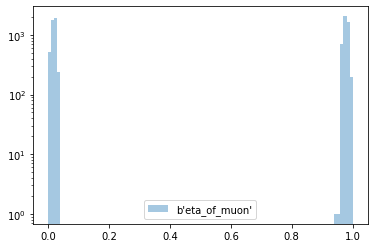

b'phi_of_muon'


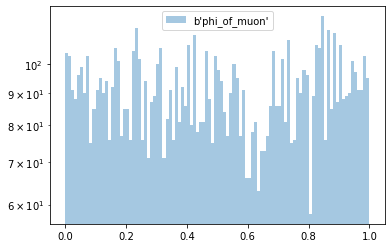

b'energy_of_muon'


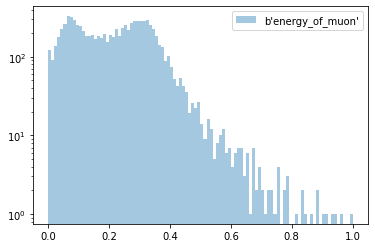

b'hcal_ieta'


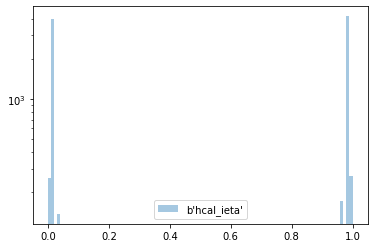

b'hcal_iphi'


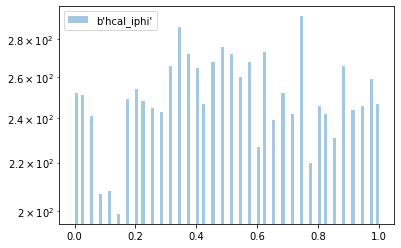

b'IsolationR04'


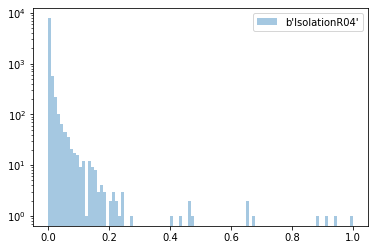

b'IsolationR03'


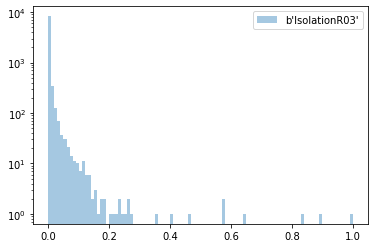

b'ecal_3into3'


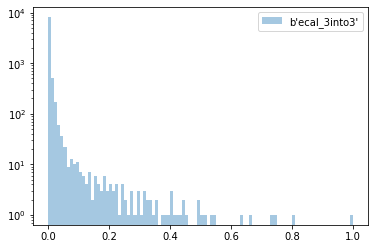

b'hcal_3into3'


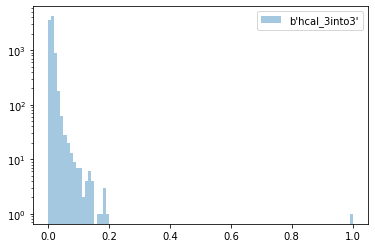

b'ecal_3x3'


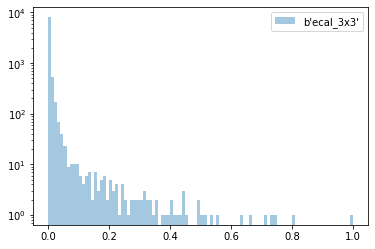

b'hcal_1x1'


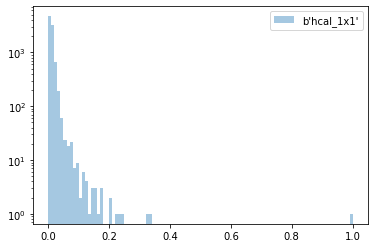

b'hcal_edepth1'_x


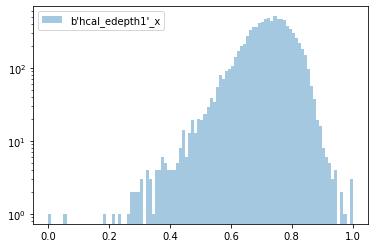

b'hcal_edepth2'_x


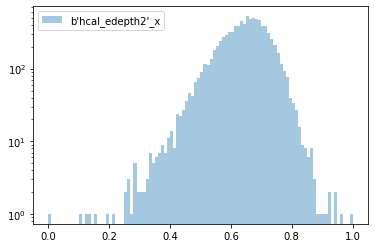

b'hcal_edepth3'_x


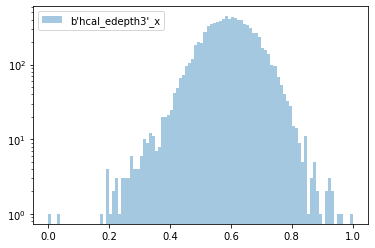

b'hcal_edepth4'_x


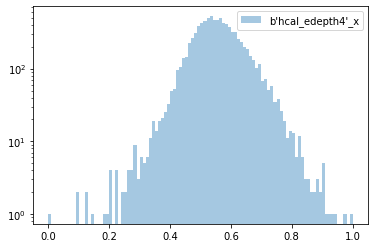

b'hcal_edepth5'_x


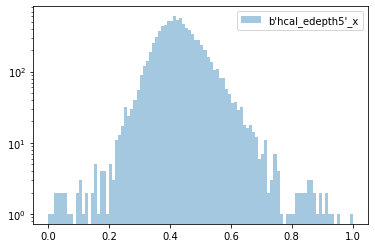

b'hcal_edepth6'_x


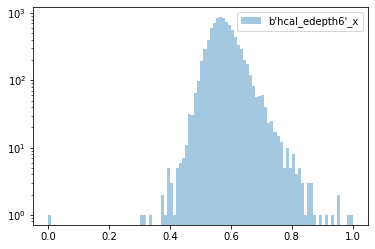

b'hcal_edepth7'_x


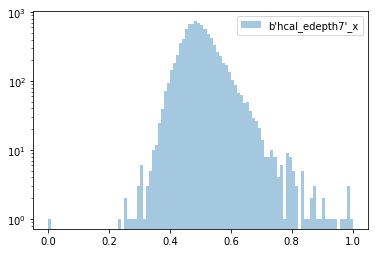

b'hcal_edepth1'_y


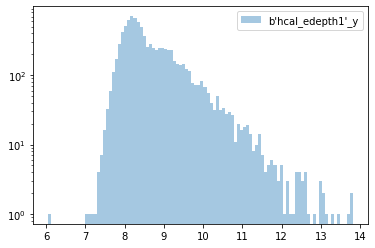

b'hcal_edepth2'_y


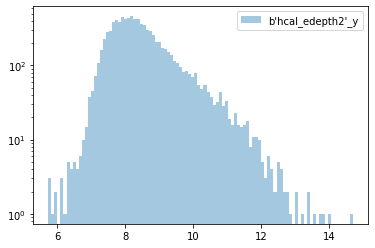

b'hcal_edepth3'_y


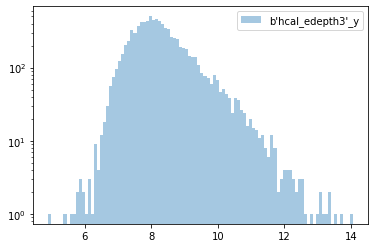

b'hcal_edepth4'_y


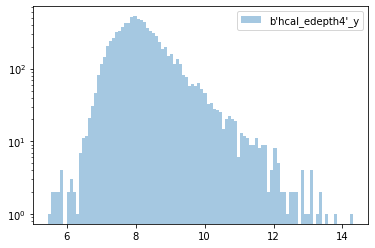

b'hcal_edepth5'_y


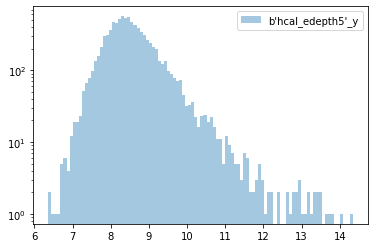

b'hcal_edepth6'_y


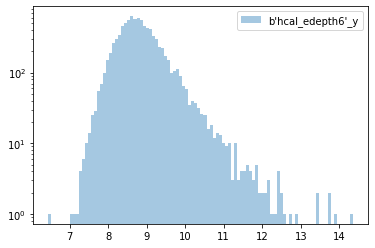

b'hcal_edepth7'_y


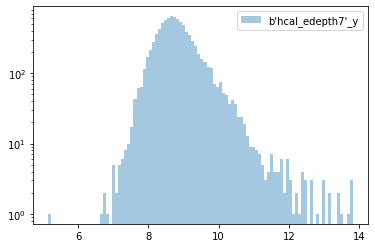

hcal_edepth1_un


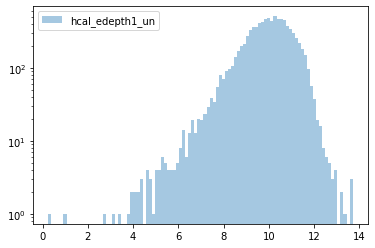

hcal_edepth2_un


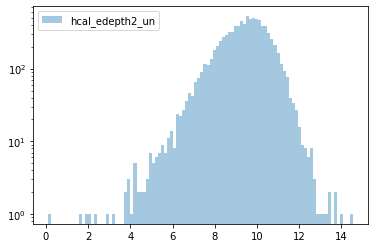

hcal_edepth3_un


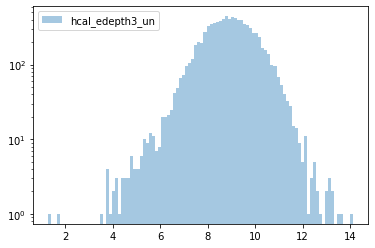

hcal_edepth4_un


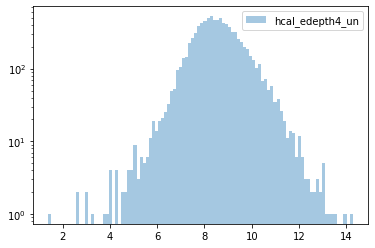

hcal_edepth5_un


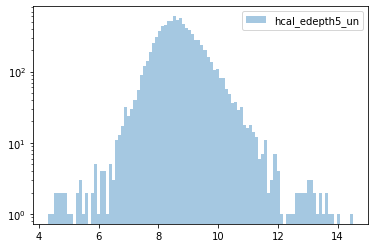

hcal_edepth6_un


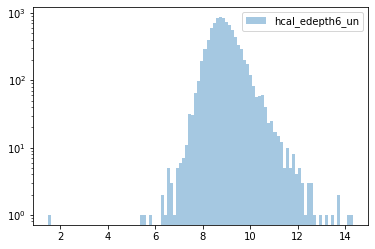

hcal_edepth7_un


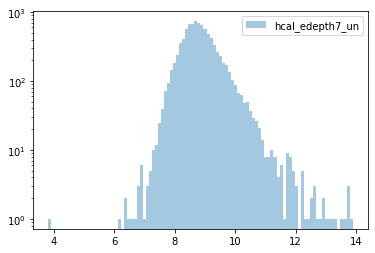

hcal_ieta_un


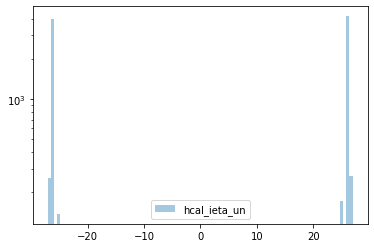

In [254]:
for i in (df.keys()):
    print (i)

    plt.hist(df[i],bins=100,label=str(i),alpha=0.4)
    plt.yscale("log")
    plt.legend()
    plt.show()

In [255]:
#print(df.keys)
data = df.values
print (data.shape[0])
ntest = 8800
testindx = data.shape[0] - ntest
X_train_depth1 = data[:testindx,np.r_[0:12,12]]   
X_train_depth2 = data[:testindx,np.r_[0:12,13]] 
X_train_depth3 = data[:testindx,np.r_[0:12,14]] 
X_train_depth4 = data[:testindx,np.r_[0:12,15]] 
X_train_depth5 = data[:testindx,np.r_[0:12,16]] 
X_train_depth6 = data[:testindx,np.r_[0:12,17]] 
X_train_depth7 = data[:testindx,np.r_[0:12,18]]

Y_train_depth1 = data[:testindx,19]
Y_train_depth2 = data[:testindx,20]
Y_train_depth3 = data[:testindx,21]
Y_train_depth4 = data[:testindx,22]
Y_train_depth5 = data[:testindx,23]
Y_train_depth6 = data[:testindx,24]
Y_train_depth7 = data[:testindx,25]

X_test = data[testindx:,:]
#print(X_test)
print (X_test.shape) 
print ("shape of X_train_depth1:",X_train_depth1.shape)
#print ("shape of X_train_depth2:",X_train_depth2.shape)
print ("shape of Y_train_depth2:",Y_train_depth1.shape)


9005
(8800, 34)
shape of X_train_depth1: (205, 13)
shape of Y_train_depth2: (205,)


true_hist_depth1[0] =  [130  61  11   3]
sum weight_depth1: 100.0
true_hist_depth1 [130  61  11   3]
weight_vals_depth1: [ 1.71577611  3.65657203 20.27735397 74.3502979 ]


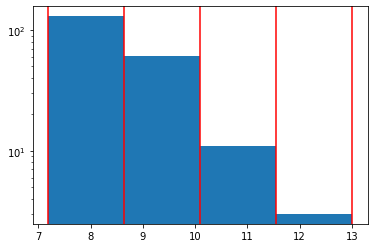

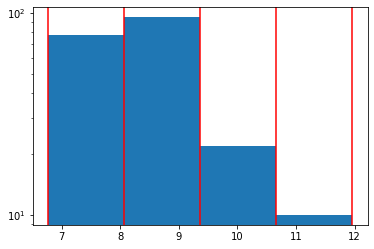

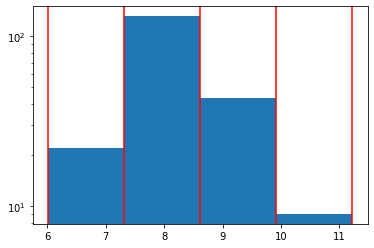

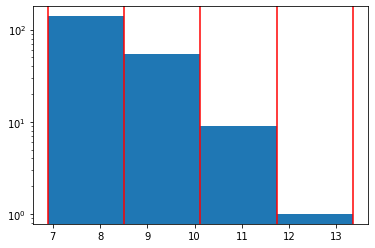

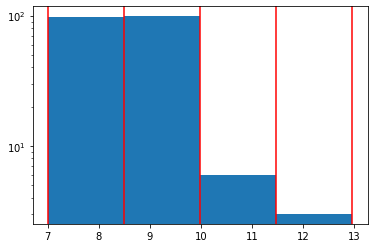

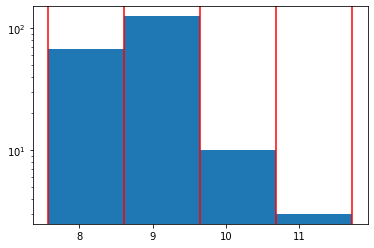

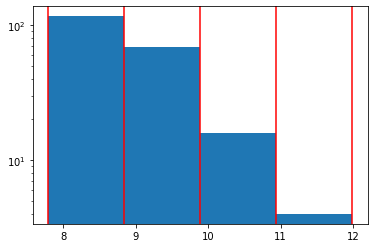

In [256]:
# sample weights
histoAR_depth1 = Y_train_depth1.copy()
histoAR_depth2 = Y_train_depth2.copy()
histoAR_depth3 = Y_train_depth3.copy()
histoAR_depth4 = Y_train_depth4.copy()
histoAR_depth5 = Y_train_depth5.copy()
histoAR_depth6 = Y_train_depth6.copy()
histoAR_depth7 = Y_train_depth7.copy()

nbins = 4 ### works best[4 with no sqrt / 500 with sqrt normed] / 1000 with norm*100 / 4000 ok no sqrt

true_hist_depth1 = np.histogram(histoAR_depth1,bins = nbins,
                                range=(np.min(Y_train_depth1)-0.001,np.max(Y_train_depth1)+0.001))
true_hist_depth2 = np.histogram(histoAR_depth2,bins = nbins,
                                range=(np.min(Y_train_depth2)-0.001,np.max(Y_train_depth2)+0.001))
true_hist_depth3 = np.histogram(histoAR_depth3,bins = nbins,
                                range=(np.min(Y_train_depth3)-0.001,np.max(Y_train_depth3)+0.001))
true_hist_depth4 = np.histogram(histoAR_depth4,bins = nbins,
                                range=(np.min(Y_train_depth4)-0.001,np.max(Y_train_depth4)+0.001))
true_hist_depth5 = np.histogram(histoAR_depth5,bins = nbins,
                                range=(np.min(Y_train_depth5)-0.001,np.max(Y_train_depth5)+0.001))
true_hist_depth6 = np.histogram(histoAR_depth6,bins = nbins,
                                range=(np.min(Y_train_depth6)-0.001,np.max(Y_train_depth6)+0.001))
true_hist_depth7 = np.histogram(histoAR_depth7,bins = nbins,
                                range=(np.min(Y_train_depth7)-0.001,np.max(Y_train_depth7)+0.001))


binweight_depth1 = true_hist_depth1[0][np.digitize(histoAR_depth1,true_hist_depth1[1]) - 1]
binweight_depth2 = true_hist_depth2[0][np.digitize(histoAR_depth2,true_hist_depth2[1]) - 1]
binweight_depth3 = true_hist_depth3[0][np.digitize(histoAR_depth3,true_hist_depth3[1]) - 1]
binweight_depth4 = true_hist_depth4[0][np.digitize(histoAR_depth4,true_hist_depth4[1]) - 1]
binweight_depth5 = true_hist_depth5[0][np.digitize(histoAR_depth5,true_hist_depth5[1]) - 1]
binweight_depth6 = true_hist_depth6[0][np.digitize(histoAR_depth6,true_hist_depth6[1]) - 1]
binweight_depth7 = true_hist_depth7[0][np.digitize(histoAR_depth7,true_hist_depth7[1]) - 1]


print ("true_hist_depth1[0] = ", true_hist_depth1[0])

binweight_depth1 = 1/binweight_depth1
binweight_depth2 = 1/binweight_depth2
binweight_depth3 = 1/binweight_depth3
binweight_depth4 = 1/binweight_depth4
binweight_depth5 = 1/binweight_depth5
binweight_depth6 = 1/binweight_depth6
binweight_depth7 = 1/binweight_depth7

binweight_depth1 = 100*binweight_depth1/np.sum(np.unique(binweight_depth1)) ## 5000/5 ok
binweight_depth2 = 100*binweight_depth2/np.sum(np.unique(binweight_depth2))
binweight_depth3 = 100*binweight_depth3/np.sum(np.unique(binweight_depth3))
binweight_depth4 = 100*binweight_depth4/np.sum(np.unique(binweight_depth4))
binweight_depth5 = 100*binweight_depth5/np.sum(np.unique(binweight_depth5))
binweight_depth6 = 100*binweight_depth6/np.sum(np.unique(binweight_depth6))
binweight_depth7 = 100*binweight_depth7/np.sum(np.unique(binweight_depth7))


print("sum weight_depth1:",np.sum(np.unique(binweight_depth1)))
print("true_hist_depth1",true_hist_depth1[0])
#print("binweight_depth1",binweight_depth1)
print("weight_vals_depth1:",np.unique(binweight_depth1))


binweight=[binweight_depth1, binweight_depth2, binweight_depth3, binweight_depth4, binweight_depth5,
           binweight_depth6, binweight_depth7]
    
histoAR = [histoAR_depth1, histoAR_depth2, histoAR_depth3, histoAR_depth4, histoAR_depth5,
           histoAR_depth6, histoAR_depth7]
    
true_hist = [true_hist_depth1[1], true_hist_depth2[1], true_hist_depth3[1], true_hist_depth4[1], 
             true_hist_depth5[1], true_hist_depth6[1], true_hist_depth7[1]]
    
for i in range (0,7):
    plt.hist(histoAR[i],bins=nbins)
    
    for j in true_hist[i]:
        plt.axvline(j,color='r')
        
    plt.yscale("log")
    plt.show()


In [257]:
import keras.backend as kb
def custom_loss_depth(preds, targets):
    return (kb.square(preds-targets))


In [321]:
PYTHONHASHSEED=0
from numpy.random import seed
seed(1)
import tensorflow as tf
tf.random.set_seed(2)
from keras.layers import concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

print ("creating model=========>")

input1=Input(shape=(X_train_depth1.shape[1],))
input2=Input(shape=(X_train_depth2.shape[1],))
input3=Input(shape=(X_train_depth3.shape[1],))
input4=Input(shape=(X_train_depth4.shape[1],))
input5=Input(shape=(X_train_depth5.shape[1],))
input6=Input(shape=(X_train_depth6.shape[1],))
input7=Input(shape=(X_train_depth7.shape[1],))

x1 = Dense(32, activation="relu")(input1)
x1 = Dense(16, activation="relu")(x1)
x1 = Dense(1, activation="relu")(x1)
x1 = Model(inputs=input1, outputs=x1)
x2 = Dense(32, activation="relu")(input2)
x2 = Dense(16, activation="relu")(x2)
x2 = Dense(8, activation="relu")(x2)
x2 = Dense(1, activation="relu")(x2)
x2 = Model(inputs=input2, outputs=x2)
x3 = Dense(32, activation="relu")(input3)
x3 = Dense(16, activation="relu")(x3)
x3 = Dense(8, activation="relu")(x3)
x3 = Dense(1, activation="relu")(x3)
x3 = Model(inputs=input3, outputs=x3)
x4 = Dense(32, activation="relu")(input4)
x4 = Dense(16, activation="relu")(x4)
x4 = Dense(8, activation="relu")(x4)
x4 = Dense(1, activation="relu")(x4)
x4 = Model(inputs=input4, outputs=x4)
x5 = Dense(32, activation="relu")(input5)
x5 = Dense(16, activation="relu")(x5)
x5 = Dense(1, activation="relu")(x5)
x5 = Model(inputs=input5, outputs=x5)
x6 = Dense(32, activation="relu")(input6)
x6 = Dense(16, activation="relu")(x6)
x6 = Dense(1, activation="relu")(x6)
x6 = Model(inputs=input6, outputs=x6)
x7 = Dense(32, activation="relu")(input7)
x7 = Dense(16, activation="relu")(x7)
x7 = Dense(1, activation="relu")(x7)
x7 = Model(inputs=input7, outputs=x7)

combined = tf.keras.layers.Concatenate()([x1.output, x2.output, x3.output, x4.output, 
                                          x5.output, x6.output, x7.output])

z1 = Dense(32)(combined)
z1 = Dense(16)(z1)
z1 = Dense(7)(z1)

#z1 = Dense(64, activation="relu")(combined)
#z1 = Dense(16, activation="relu")(z1)
#z1 = Dense(7, activation="relu")(z1)


model = Model(inputs=[x1.input, x2.input, x3.input, x4.input, x5.input, x6.input, x7.input], outputs=z1)
model.compile(loss=custom_loss_depth,optimizer='adam')
model.summary()
print ("fitting now=========>")
history = model.fit([X_train_depth1, X_train_depth2, X_train_depth3, X_train_depth4, X_train_depth5, 
                     X_train_depth6, X_train_depth7], 
                    [Y_train_depth1, Y_train_depth2, Y_train_depth3, Y_train_depth4, Y_train_depth5, 
                     Y_train_depth6, Y_train_depth7], 
                    batch_size=4000, epochs=2000, validation_split=0.1, verbose=1,sample_weight=binweight)


creating model=========>
Model: "model_359"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_310 (InputLayer)          [(None, 13)]         0                                            
__________________________________________________________________________________________________
input_311 (InputLayer)          [(None, 13)]         0                                            
__________________________________________________________________________________________________
input_312 (InputLayer)          [(None, 13)]         0                                            
__________________________________________________________________________________________________
input_309 (InputLayer)          [(None, 13)]         0                                            
_________________________________________________________________

1/1 [==============================] - 0s 36ms/step - loss: 482.1957 - val_loss: 275.5503
Epoch 3/2000
1/1 [==============================] - 0s 33ms/step - loss: 480.6373 - val_loss: 274.5400
Epoch 4/2000
1/1 [==============================] - 0s 34ms/step - loss: 479.1088 - val_loss: 273.5495
Epoch 5/2000
1/1 [==============================] - 0s 33ms/step - loss: 477.5752 - val_loss: 272.5328
Epoch 6/2000
1/1 [==============================] - 0s 33ms/step - loss: 476.0110 - val_loss: 271.4687
Epoch 7/2000
1/1 [==============================] - 0s 34ms/step - loss: 474.4082 - val_loss: 270.3515
Epoch 8/2000
1/1 [==============================] - 0s 33ms/step - loss: 472.7274 - val_loss: 269.1853
Epoch 9/2000
1/1 [==============================] - 0s 34ms/step - loss: 470.9734 - val_loss: 267.9741
Epoch 10/2000
1/1 [==============================] - 0s 33ms/step - loss: 469.1486 - val_loss: 266.7060
Epoch 11/2000
1/1 [==============================] - 0s 34ms/step - loss: 467.2364 - 

1/1 [==============================] - 0s 34ms/step - loss: 27.2481 - val_loss: 9.6489
Epoch 82/2000
1/1 [==============================] - 0s 35ms/step - loss: 25.7495 - val_loss: 9.0742
Epoch 83/2000
1/1 [==============================] - 0s 35ms/step - loss: 24.5522 - val_loss: 8.6856
Epoch 84/2000
1/1 [==============================] - 0s 34ms/step - loss: 23.6117 - val_loss: 8.4529
Epoch 85/2000
1/1 [==============================] - 0s 36ms/step - loss: 22.8835 - val_loss: 8.3433
Epoch 86/2000
1/1 [==============================] - 0s 36ms/step - loss: 22.3240 - val_loss: 8.3258
Epoch 87/2000
1/1 [==============================] - 0s 36ms/step - loss: 21.8915 - val_loss: 8.3703
Epoch 88/2000
1/1 [==============================] - 0s 35ms/step - loss: 21.5464 - val_loss: 8.4490
Epoch 89/2000
1/1 [==============================] - 0s 35ms/step - loss: 21.2562 - val_loss: 8.5376
Epoch 90/2000
1/1 [==============================] - 0s 33ms/step - loss: 20.9951 - val_loss: 8.6165
Epoc

Epoch 162/2000
1/1 [==============================] - 0s 32ms/step - loss: 8.3085 - val_loss: 3.8978
Epoch 163/2000
1/1 [==============================] - 0s 32ms/step - loss: 8.2065 - val_loss: 3.8670
Epoch 164/2000
1/1 [==============================] - 0s 32ms/step - loss: 8.1058 - val_loss: 3.8412
Epoch 165/2000
1/1 [==============================] - 0s 32ms/step - loss: 8.0049 - val_loss: 3.8194
Epoch 166/2000
1/1 [==============================] - 0s 32ms/step - loss: 7.9032 - val_loss: 3.8008
Epoch 167/2000
1/1 [==============================] - 0s 32ms/step - loss: 7.8013 - val_loss: 3.7846
Epoch 168/2000
1/1 [==============================] - 0s 32ms/step - loss: 7.6987 - val_loss: 3.7691
Epoch 169/2000
1/1 [==============================] - 0s 33ms/step - loss: 7.6006 - val_loss: 3.7384
Epoch 170/2000
1/1 [==============================] - 0s 32ms/step - loss: 7.4984 - val_loss: 3.6942
Epoch 171/2000
1/1 [==============================] - ETA: 0s - loss: 7.395 - 0s 34ms/step 

Epoch 243/2000
1/1 [==============================] - 0s 33ms/step - loss: 3.8044 - val_loss: 2.4005
Epoch 244/2000
1/1 [==============================] - 0s 32ms/step - loss: 3.7882 - val_loss: 2.4078
Epoch 245/2000
1/1 [==============================] - 0s 32ms/step - loss: 3.7700 - val_loss: 2.4090
Epoch 246/2000
1/1 [==============================] - 0s 33ms/step - loss: 3.7524 - val_loss: 2.4002
Epoch 247/2000
1/1 [==============================] - 0s 33ms/step - loss: 3.7337 - val_loss: 2.3972
Epoch 248/2000
1/1 [==============================] - 0s 33ms/step - loss: 3.7173 - val_loss: 2.4022
Epoch 249/2000
1/1 [==============================] - 0s 33ms/step - loss: 3.7006 - val_loss: 2.4028
Epoch 250/2000
1/1 [==============================] - 0s 33ms/step - loss: 3.6859 - val_loss: 2.3937
Epoch 251/2000
1/1 [==============================] - 0s 36ms/step - loss: 3.6664 - val_loss: 2.3828
Epoch 252/2000
1/1 [==============================] - 0s 33ms/step - loss: 3.6491 - val_los

1/1 [==============================] - 0s 33ms/step - loss: 2.7115 - val_loss: 2.3116
Epoch 325/2000
1/1 [==============================] - 0s 32ms/step - loss: 2.7018 - val_loss: 2.3178
Epoch 326/2000
1/1 [==============================] - 0s 33ms/step - loss: 2.6924 - val_loss: 2.3128
Epoch 327/2000
1/1 [==============================] - 0s 32ms/step - loss: 2.6862 - val_loss: 2.3105
Epoch 328/2000
1/1 [==============================] - 0s 33ms/step - loss: 2.6798 - val_loss: 2.3160
Epoch 329/2000
1/1 [==============================] - 0s 32ms/step - loss: 2.6724 - val_loss: 2.3266
Epoch 330/2000
1/1 [==============================] - 0s 33ms/step - loss: 2.6635 - val_loss: 2.3331
Epoch 331/2000
1/1 [==============================] - 0s 36ms/step - loss: 2.6555 - val_loss: 2.3332
Epoch 332/2000
1/1 [==============================] - 0s 33ms/step - loss: 2.6466 - val_loss: 2.3202
Epoch 333/2000
1/1 [==============================] - 0s 35ms/step - loss: 2.6397 - val_loss: 2.3038
Epoch

1/1 [==============================] - 0s 32ms/step - loss: 2.2067 - val_loss: 2.1793
Epoch 406/2000
1/1 [==============================] - 0s 32ms/step - loss: 2.2025 - val_loss: 2.1779
Epoch 407/2000
1/1 [==============================] - 0s 32ms/step - loss: 2.1970 - val_loss: 2.1772
Epoch 408/2000
1/1 [==============================] - 0s 33ms/step - loss: 2.1924 - val_loss: 2.1788
Epoch 409/2000
1/1 [==============================] - 0s 32ms/step - loss: 2.1887 - val_loss: 2.1721
Epoch 410/2000
1/1 [==============================] - 0s 33ms/step - loss: 2.1836 - val_loss: 2.1644
Epoch 411/2000
1/1 [==============================] - 0s 34ms/step - loss: 2.1792 - val_loss: 2.1532
Epoch 412/2000
1/1 [==============================] - 0s 32ms/step - loss: 2.1758 - val_loss: 2.1482
Epoch 413/2000
1/1 [==============================] - 0s 33ms/step - loss: 2.1716 - val_loss: 2.1444
Epoch 414/2000
1/1 [==============================] - 0s 32ms/step - loss: 2.1671 - val_loss: 2.1442
Epoch

1/1 [==============================] - 0s 36ms/step - loss: 1.9238 - val_loss: 2.1123
Epoch 487/2000
1/1 [==============================] - 0s 35ms/step - loss: 1.9211 - val_loss: 2.1058
Epoch 488/2000
1/1 [==============================] - 0s 36ms/step - loss: 1.9180 - val_loss: 2.1083
Epoch 489/2000
1/1 [==============================] - 0s 36ms/step - loss: 1.9152 - val_loss: 2.1049
Epoch 490/2000
1/1 [==============================] - 0s 36ms/step - loss: 1.9128 - val_loss: 2.1073
Epoch 491/2000
1/1 [==============================] - 0s 34ms/step - loss: 1.9101 - val_loss: 2.1019
Epoch 492/2000
1/1 [==============================] - 0s 33ms/step - loss: 1.9068 - val_loss: 2.1026
Epoch 493/2000
1/1 [==============================] - 0s 33ms/step - loss: 1.9044 - val_loss: 2.0903
Epoch 494/2000
1/1 [==============================] - 0s 33ms/step - loss: 1.9017 - val_loss: 2.0873
Epoch 495/2000
1/1 [==============================] - 0s 33ms/step - loss: 1.8992 - val_loss: 2.0793
Epoch

1/1 [==============================] - 0s 34ms/step - loss: 1.7046 - val_loss: 2.0917
Epoch 568/2000
1/1 [==============================] - 0s 32ms/step - loss: 1.7021 - val_loss: 2.0969
Epoch 569/2000
1/1 [==============================] - 0s 33ms/step - loss: 1.6996 - val_loss: 2.0898
Epoch 570/2000
1/1 [==============================] - 0s 32ms/step - loss: 1.6966 - val_loss: 2.0794
Epoch 571/2000
1/1 [==============================] - 0s 34ms/step - loss: 1.6939 - val_loss: 2.0703
Epoch 572/2000
1/1 [==============================] - 0s 33ms/step - loss: 1.6911 - val_loss: 2.0638
Epoch 573/2000
1/1 [==============================] - 0s 32ms/step - loss: 1.6885 - val_loss: 2.0627
Epoch 574/2000
1/1 [==============================] - 0s 32ms/step - loss: 1.6858 - val_loss: 2.0512
Epoch 575/2000
1/1 [==============================] - 0s 32ms/step - loss: 1.6830 - val_loss: 2.0433
Epoch 576/2000
1/1 [==============================] - 0s 33ms/step - loss: 1.6809 - val_loss: 2.0451
Epoch

1/1 [==============================] - 0s 33ms/step - loss: 1.5117 - val_loss: 1.9608
Epoch 649/2000
1/1 [==============================] - 0s 33ms/step - loss: 1.5094 - val_loss: 1.9610
Epoch 650/2000
1/1 [==============================] - 0s 33ms/step - loss: 1.5080 - val_loss: 1.9547
Epoch 651/2000
1/1 [==============================] - 0s 33ms/step - loss: 1.5062 - val_loss: 1.9432
Epoch 652/2000
1/1 [==============================] - 0s 33ms/step - loss: 1.5045 - val_loss: 1.9432
Epoch 653/2000
1/1 [==============================] - 0s 33ms/step - loss: 1.5023 - val_loss: 1.9514
Epoch 654/2000
1/1 [==============================] - 0s 34ms/step - loss: 1.5009 - val_loss: 1.9566
Epoch 655/2000
1/1 [==============================] - 0s 34ms/step - loss: 1.4997 - val_loss: 1.9497
Epoch 656/2000
1/1 [==============================] - 0s 33ms/step - loss: 1.4971 - val_loss: 1.9495
Epoch 657/2000
1/1 [==============================] - 0s 33ms/step - loss: 1.4951 - val_loss: 1.9493
Epoch

1/1 [==============================] - 0s 33ms/step - loss: 1.3705 - val_loss: 2.0385
Epoch 730/2000
1/1 [==============================] - 0s 33ms/step - loss: 1.3689 - val_loss: 2.0397
Epoch 731/2000
1/1 [==============================] - 0s 33ms/step - loss: 1.3678 - val_loss: 2.0326
Epoch 732/2000
1/1 [==============================] - 0s 36ms/step - loss: 1.3658 - val_loss: 2.0297
Epoch 733/2000
1/1 [==============================] - 0s 34ms/step - loss: 1.3644 - val_loss: 2.0520
Epoch 734/2000
1/1 [==============================] - 0s 34ms/step - loss: 1.3628 - val_loss: 2.0367
Epoch 735/2000
1/1 [==============================] - 0s 34ms/step - loss: 1.3610 - val_loss: 2.0235
Epoch 736/2000
1/1 [==============================] - 0s 33ms/step - loss: 1.3598 - val_loss: 2.0252
Epoch 737/2000
1/1 [==============================] - 0s 33ms/step - loss: 1.3583 - val_loss: 2.0479
Epoch 738/2000
1/1 [==============================] - 0s 33ms/step - loss: 1.3568 - val_loss: 2.0502
Epoch

1/1 [==============================] - 0s 33ms/step - loss: 1.2654 - val_loss: 2.0494
Epoch 811/2000
1/1 [==============================] - 0s 33ms/step - loss: 1.2638 - val_loss: 2.0204
Epoch 812/2000
1/1 [==============================] - 0s 32ms/step - loss: 1.2629 - val_loss: 2.0523
Epoch 813/2000
1/1 [==============================] - 0s 32ms/step - loss: 1.2612 - val_loss: 2.0677
Epoch 814/2000
1/1 [==============================] - 0s 33ms/step - loss: 1.2607 - val_loss: 2.0173
Epoch 815/2000
1/1 [==============================] - 0s 32ms/step - loss: 1.2594 - val_loss: 2.0274
Epoch 816/2000
1/1 [==============================] - 0s 32ms/step - loss: 1.2579 - val_loss: 2.0466
Epoch 817/2000
1/1 [==============================] - 0s 33ms/step - loss: 1.2559 - val_loss: 2.0253
Epoch 818/2000
1/1 [==============================] - 0s 32ms/step - loss: 1.2541 - val_loss: 2.0238
Epoch 819/2000
1/1 [==============================] - 0s 33ms/step - loss: 1.2535 - val_loss: 2.0330
Epoch

1/1 [==============================] - 0s 32ms/step - loss: 1.1773 - val_loss: 1.9020
Epoch 892/2000
1/1 [==============================] - 0s 32ms/step - loss: 1.1762 - val_loss: 1.9090
Epoch 893/2000
1/1 [==============================] - 0s 33ms/step - loss: 1.1750 - val_loss: 1.8909
Epoch 894/2000
1/1 [==============================] - 0s 32ms/step - loss: 1.1738 - val_loss: 1.8934
Epoch 895/2000
1/1 [==============================] - 0s 32ms/step - loss: 1.1740 - val_loss: 1.8639
Epoch 896/2000
1/1 [==============================] - 0s 32ms/step - loss: 1.1731 - val_loss: 1.8794
Epoch 897/2000
1/1 [==============================] - 0s 32ms/step - loss: 1.1715 - val_loss: 1.8843
Epoch 898/2000
1/1 [==============================] - 0s 33ms/step - loss: 1.1706 - val_loss: 1.8804
Epoch 899/2000
1/1 [==============================] - 0s 33ms/step - loss: 1.1700 - val_loss: 1.8999
Epoch 900/2000
1/1 [==============================] - 0s 32ms/step - loss: 1.1684 - val_loss: 1.8678
Epoch

1/1 [==============================] - 0s 33ms/step - loss: 1.0782 - val_loss: 1.6354
Epoch 973/2000
1/1 [==============================] - 0s 33ms/step - loss: 1.0767 - val_loss: 1.6230
Epoch 974/2000
1/1 [==============================] - 0s 33ms/step - loss: 1.0749 - val_loss: 1.6035
Epoch 975/2000
1/1 [==============================] - 0s 33ms/step - loss: 1.0743 - val_loss: 1.6169
Epoch 976/2000
1/1 [==============================] - 0s 33ms/step - loss: 1.0729 - val_loss: 1.5875
Epoch 977/2000
1/1 [==============================] - 0s 33ms/step - loss: 1.0722 - val_loss: 1.5896
Epoch 978/2000
1/1 [==============================] - 0s 33ms/step - loss: 1.0711 - val_loss: 1.5672
Epoch 979/2000
1/1 [==============================] - 0s 33ms/step - loss: 1.0695 - val_loss: 1.5787
Epoch 980/2000
1/1 [==============================] - 0s 32ms/step - loss: 1.0683 - val_loss: 1.5637
Epoch 981/2000
1/1 [==============================] - 0s 33ms/step - loss: 1.0665 - val_loss: 1.5400
Epoch

1/1 [==============================] - 0s 32ms/step - loss: 0.9875 - val_loss: 1.3817
Epoch 1053/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.9853 - val_loss: 1.3611
Epoch 1054/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.9836 - val_loss: 1.3355
Epoch 1055/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.9834 - val_loss: 1.3907
Epoch 1056/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.9824 - val_loss: 1.3614
Epoch 1057/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.9808 - val_loss: 1.3833
Epoch 1058/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.9793 - val_loss: 1.3806
Epoch 1059/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.9780 - val_loss: 1.3251
Epoch 1060/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.9771 - val_loss: 1.3364
Epoch 1061/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.9757 - val_loss: 1.3

1/1 [==============================] - 0s 32ms/step - loss: 0.8993 - val_loss: 1.3681
Epoch 1133/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.8950 - val_loss: 1.3774
Epoch 1134/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.8946 - val_loss: 1.3170
Epoch 1135/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.8965 - val_loss: 1.4166
Epoch 1136/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.8937 - val_loss: 1.3882
Epoch 1137/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.8904 - val_loss: 1.3665
Epoch 1138/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.8901 - val_loss: 1.4266
Epoch 1139/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.8913 - val_loss: 1.3386
Epoch 1140/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.8906 - val_loss: 1.3936
Epoch 1141/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.8872 - val_loss: 1.3

1/1 [==============================] - 0s 32ms/step - loss: 0.8143 - val_loss: 1.3959
Epoch 1213/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.8139 - val_loss: 1.4325
Epoch 1214/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.8136 - val_loss: 1.3729
Epoch 1215/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.8121 - val_loss: 1.4141
Epoch 1216/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.8100 - val_loss: 1.4510
Epoch 1217/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.8095 - val_loss: 1.4201
Epoch 1218/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.8085 - val_loss: 1.4314
Epoch 1219/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.8070 - val_loss: 1.4286
Epoch 1220/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.8065 - val_loss: 1.4235
Epoch 1221/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.8054 - val_loss: 1.4

1/1 [==============================] - 0s 37ms/step - loss: 0.7381 - val_loss: 1.5102
Epoch 1293/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.7380 - val_loss: 1.6190
Epoch 1294/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.7330 - val_loss: 1.5515
Epoch 1295/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.7292 - val_loss: 1.4798
Epoch 1296/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.7316 - val_loss: 1.6415
Epoch 1297/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.7356 - val_loss: 1.4836
Epoch 1298/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.7309 - val_loss: 1.5674
Epoch 1299/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.7267 - val_loss: 1.5633
Epoch 1300/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.7253 - val_loss: 1.5206
Epoch 1301/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.7265 - val_loss: 1.6

1/1 [==============================] - 0s 34ms/step - loss: 0.6552 - val_loss: 1.8582
Epoch 1373/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.6518 - val_loss: 1.8700
Epoch 1374/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.6495 - val_loss: 1.8671
Epoch 1375/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.6490 - val_loss: 1.8281
Epoch 1376/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.6478 - val_loss: 1.9186
Epoch 1377/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.6467 - val_loss: 1.8657
Epoch 1378/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.6469 - val_loss: 1.9489
Epoch 1379/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.6460 - val_loss: 1.8481
Epoch 1380/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.6457 - val_loss: 1.9167
Epoch 1381/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.6438 - val_loss: 1.8

1/1 [==============================] - 0s 32ms/step - loss: 0.5951 - val_loss: 2.0934
Epoch 1453/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.5926 - val_loss: 1.9893
Epoch 1454/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.5913 - val_loss: 2.0441
Epoch 1455/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.5902 - val_loss: 2.0420
Epoch 1456/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.5893 - val_loss: 2.0574
Epoch 1457/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.5887 - val_loss: 2.1006
Epoch 1458/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.5880 - val_loss: 2.0413
Epoch 1459/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.5876 - val_loss: 2.0732
Epoch 1460/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.5862 - val_loss: 2.0933
Epoch 1461/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.5860 - val_loss: 2.0

1/1 [==============================] - 0s 33ms/step - loss: 0.5441 - val_loss: 2.4614
Epoch 1533/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.5467 - val_loss: 2.2577
Epoch 1534/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.5484 - val_loss: 2.5189
Epoch 1535/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.5470 - val_loss: 2.3001
Epoch 1536/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.5430 - val_loss: 2.3782
Epoch 1537/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.5398 - val_loss: 2.3892
Epoch 1538/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.5395 - val_loss: 2.2834
Epoch 1539/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.5417 - val_loss: 2.5071
Epoch 1540/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.5440 - val_loss: 2.2797
Epoch 1541/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.5432 - val_loss: 2.4

1/1 [==============================] - 0s 32ms/step - loss: 0.5073 - val_loss: 2.3571
Epoch 1613/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.5088 - val_loss: 2.6142
Epoch 1614/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.5038 - val_loss: 2.5280
Epoch 1615/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.4977 - val_loss: 2.5144
Epoch 1616/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.5003 - val_loss: 2.7430
Epoch 1617/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.5025 - val_loss: 2.5044
Epoch 1618/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.4984 - val_loss: 2.5316
Epoch 1619/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.4955 - val_loss: 2.5984
Epoch 1620/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.4973 - val_loss: 2.4140
Epoch 1621/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.4987 - val_loss: 2.6

1/1 [==============================] - 0s 32ms/step - loss: 0.4613 - val_loss: 2.6466
Epoch 1693/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.4625 - val_loss: 2.8518
Epoch 1694/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.4633 - val_loss: 2.6884
Epoch 1695/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.4620 - val_loss: 2.7625
Epoch 1696/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.4593 - val_loss: 2.7797
Epoch 1697/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.4600 - val_loss: 2.6231
Epoch 1698/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.4622 - val_loss: 2.8983
Epoch 1699/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.4650 - val_loss: 2.6344
Epoch 1700/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.4644 - val_loss: 2.8818
Epoch 1701/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.4608 - val_loss: 2.7

1/1 [==============================] - 0s 33ms/step - loss: 0.4307 - val_loss: 2.8115
Epoch 1773/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.4265 - val_loss: 2.8940
Epoch 1774/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.4234 - val_loss: 3.0238
Epoch 1775/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.4254 - val_loss: 2.8208
Epoch 1776/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.4281 - val_loss: 3.0669
Epoch 1777/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.4270 - val_loss: 2.8230
Epoch 1778/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.4235 - val_loss: 2.9038
Epoch 1779/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.4214 - val_loss: 2.9083
Epoch 1780/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.4206 - val_loss: 2.9258
Epoch 1781/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.4203 - val_loss: 3.0

1/1 [==============================] - 0s 36ms/step - loss: 0.3947 - val_loss: 2.9702
Epoch 1853/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.3955 - val_loss: 3.1740
Epoch 1854/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.3954 - val_loss: 2.9675
Epoch 1855/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.3950 - val_loss: 3.1855
Epoch 1856/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.3919 - val_loss: 3.1749
Epoch 1857/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.3905 - val_loss: 3.1647
Epoch 1858/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.3908 - val_loss: 3.2215
Epoch 1859/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.3916 - val_loss: 2.9993
Epoch 1860/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.3928 - val_loss: 3.2121
Epoch 1861/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.3913 - val_loss: 3.0

1/1 [==============================] - 0s 34ms/step - loss: 0.3669 - val_loss: 3.3610
Epoch 1933/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.3655 - val_loss: 3.2337
Epoch 1934/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.3642 - val_loss: 3.3077
Epoch 1935/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.3638 - val_loss: 3.3537
Epoch 1936/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.3632 - val_loss: 3.3003
Epoch 1937/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.3632 - val_loss: 3.4178
Epoch 1938/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.3640 - val_loss: 3.2181
Epoch 1939/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.3648 - val_loss: 3.4257
Epoch 1940/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.3652 - val_loss: 3.2081
Epoch 1941/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.3651 - val_loss: 3.4

dict_keys(['loss', 'val_loss'])


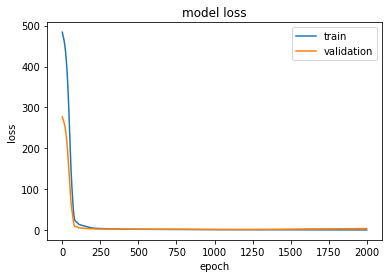

In [322]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [323]:
# evaluate model
preds = model.predict([X_test[:,np.r_[0:12,12]],X_test[:,np.r_[0:12,13]], X_test[:,np.r_[0:12,14]], 
                       X_test[:,np.r_[0:12,15]], X_test[:,np.r_[0:12,16]], X_test[:,np.r_[0:12,17]], 
                       X_test[:,np.r_[0:12,18]] ] )

targets = [X_test[:,19], X_test[:,20], X_test[:,21], X_test[:,22], X_test[:,23], X_test[:,24], X_test[:,25]]
    
uncorrected = [X_test[:,26], X_test[:,27], X_test[:,28], X_test[:,29], X_test[:,30], X_test[:,31], X_test[:,32]]

preds = preds.reshape(preds.shape[1],preds.shape[0])

for i in range (0,7):
    targets[i] = targets[i].reshape(targets[i].shape[0],1)
    uncorrected[i] = uncorrected[i].reshape(uncorrected[i].shape[0],1)
#print(preds[1])
#print(targets[1])
#print (uncorrected[1])

#print(len(targets[1]))
#print(len(uncorrected[1]))
#print(len(preds))
#print(targets[1])

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


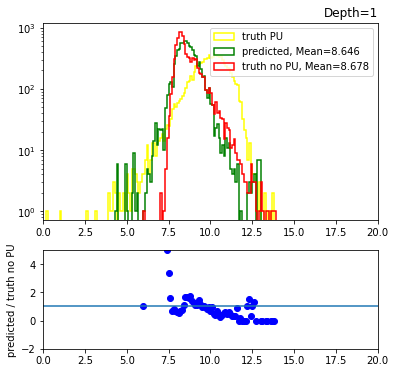

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


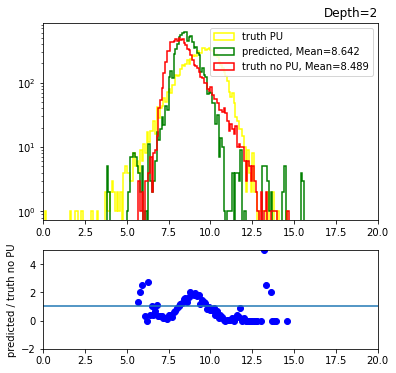

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


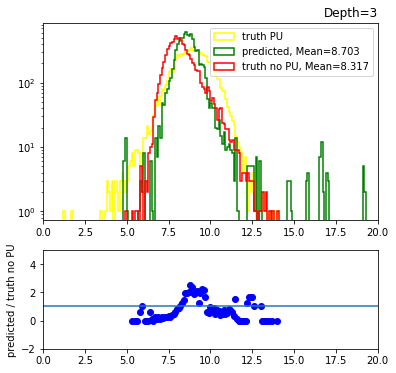

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


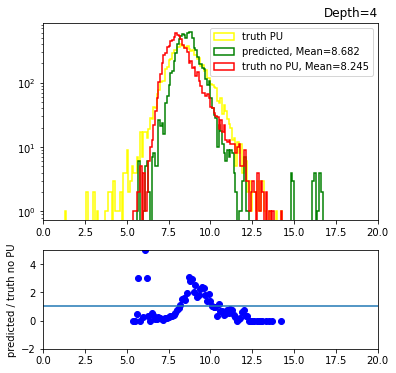

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


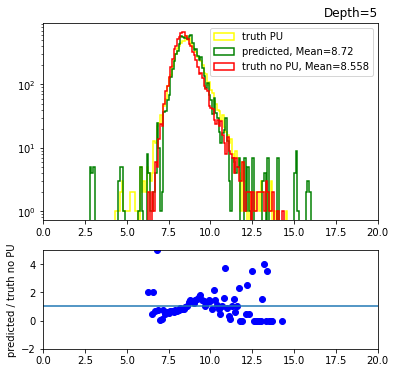

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


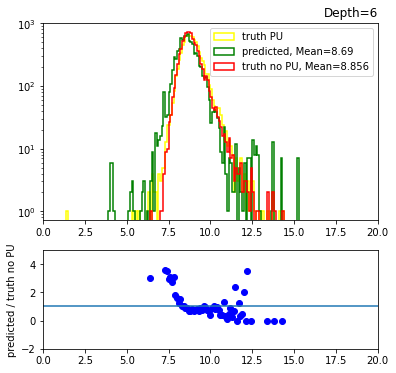

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


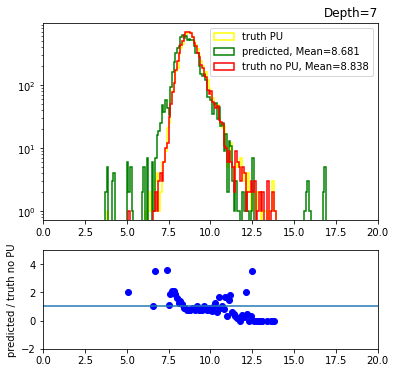

In [324]:
from matplotlib import gridspec
%matplotlib inline
i=0

for j in range (0,7):
    fig = plt.figure(figsize=(6,6))
    gs = gridspec.GridSpec(2,1, height_ratios=[2, 1]) 
    ax = plt.subplot(gs[0])
    a=round(np.mean(targets[j][:,i]),3)
    b=round(np.mean(preds[j]),3)
    ns, bins, patches = ax.hist([targets[j][:,i], preds[j], uncorrected[j][:,i]], 
                            histtype='step', bins=200,  range=(0,20), linewidth=1.5,
                            label=['truth no PU, Mean='+str(a),'predicted, Mean='+str(b), 'truth PU'], 
                            color= ['red', 'green', 'yellow'], )
    ax.legend(loc='upper right')
    ax.set_yscale('log')    
    plt.xlim(0,20)
    k=j+1
   # plt.title('ieta: '+str(ieta), loc='left')
    plt.title('Depth='+str(k), loc='right')
    
    ax1 = plt.subplot(gs[1])
    ax1.plot(bins[:-1], ns[1] / ns[0], 'bo')
    plt.ylabel('predicted / truth no PU')
    ax1.plot([-1, 21], [1, 1])
    plt.xlim(0,20)
    plt.ylim(-2,5)
    #plt.savefig('Log/ieta'+str(ieta)+'_'+str(k)+'_log.png')
    #plt.savefig('Log/ieta'+str(ieta)+'_'+str(k)+'_log.pdf')
    plt.show()


In [325]:
import statistics
b=(np.exp(preds[2])/10000)
print((np.exp(preds[0])/10000).mean())
print((np.exp(preds[1])/10000).mean())
print((np.exp(preds[2])/10000).mean())
print((np.exp(preds[3])/10000).mean())
print((np.exp(preds[4])/10000).mean())
print((np.exp(preds[5])/10000).mean())

0.8476665
1.4490035
24.443571
3.102196
2.2492704
1.5470281


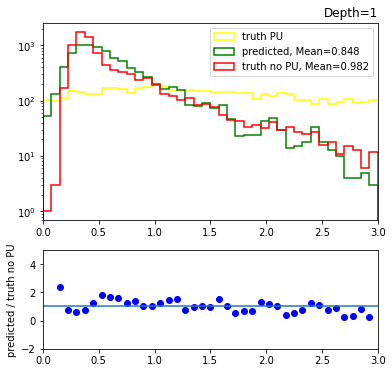

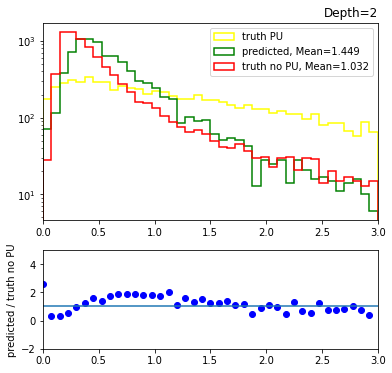

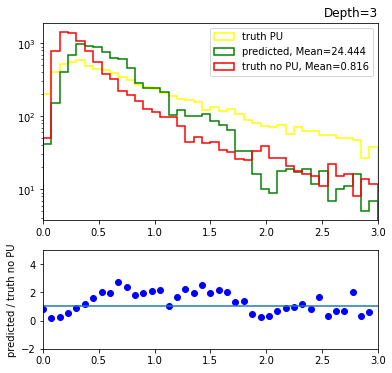

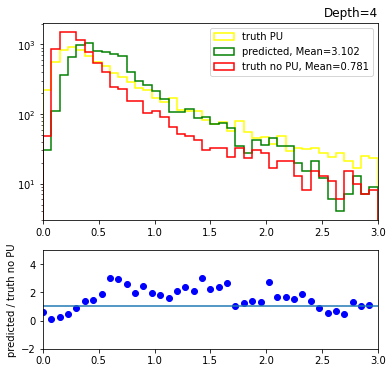

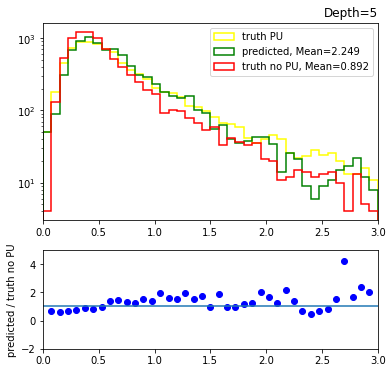

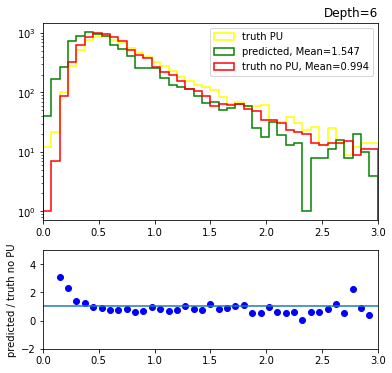

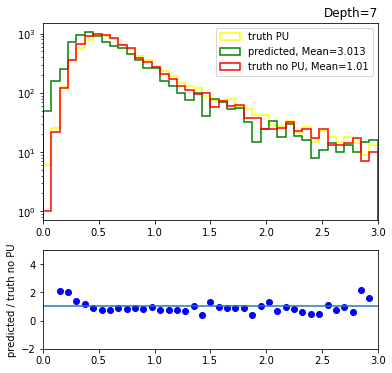

In [328]:
from matplotlib import gridspec
%matplotlib inline
i=0

for j in range (0,7):
    fig = plt.figure(figsize=(6,6))
    gs = gridspec.GridSpec(2,1, height_ratios=[2, 1]) 
    ax = plt.subplot(gs[0])
    a=round(np.mean(np.exp((targets[j][:,i]))/10000),3)
    b=round(np.mean(np.exp(preds[j])/10000),3)
    ns, bins, patches = ax.hist([(np.exp((targets[j][:,i]))/10000), (np.exp(preds[j])/10000),
                                 (np.exp(uncorrected[j][:,i])/10000)], histtype='step', bins=40,  range=(0,3), 
                                linewidth=1.5, label=['truth no PU, Mean='+str(a),'predicted, Mean='+str(b), 
                                                      'truth PU'], color= ['red', 'green', 'yellow'], )
    ax.legend(loc='upper right')
    ax.set_yscale('log')   
    plt.xlim(0,3)
    k=j+1
    #plt.title('ieta: '+str(ieta), loc='left')
    plt.title('Depth='+str(k), loc='right')
    
    ax1 = plt.subplot(gs[1])
    ax1.plot(bins[:-1], ns[1] / ns[0], 'bo')
    plt.ylabel('predicted / truth no PU')
    ax1.plot([-1, 3], [1, 1])
    plt.xlim(0,3)
    plt.ylim(-2,5)
    plt.savefig('nonLog1/Depth'+str(k)+'_nonLog.png')
    plt.savefig('nonLog1/Depth'+str(k)+'_nonLog.pdf')
    plt.show()
    



In [329]:
#save model
import os
if not os.path.exists('model'):
    os.makedirs('model')
model.save('model/model_sep22.h5')

In [330]:
import h5py
hf=h5py.File('model/model_sep22.h5','r')
hf.keys()

<KeysViewHDF5 ['model_weights', 'optimizer_weights']>